# Исследование интернет-магазина "Стримчик"

В данном исследовании мы проанализируем видеоигры выпущенные в период с 1980 по 2016 гг. Основная задача - определить потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

В данных мы имеем следующие критерии:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Пройдем следующие пункты:

* Осмотрим данные
* Проверим пропуски и типы данных, подгтовим данные к анализу
* Проведем исследовательский анализ
* Сделаем портрет пользователей каждого региона
* Проверим гипотезы
* Опишем общий вывод

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from IPython.display import display_html
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


* `EC` Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.
* `E`	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
* `E 10+`	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
* `T` Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
* `M`	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
* `AO`	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.
* `RP`	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Подготовьте данные


In [4]:
df.isna().mean().sort_values(ascending=False) 

Critic_Score       0.513192
Rating             0.404786
User_Score         0.400897
Year_of_Release    0.016093
Name               0.000120
Genre              0.000120
Platform           0.000000
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
dtype: float64

In [5]:
 df.duplicated().sum() #дубликатов нет

0

#### Приводим столбцы к нижнему регистру

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
#Можно через #df['название_столбца'] = df['название_столбца'].str.lower() 

In [8]:
df = df.rename(
    columns={
    'Name' : 'name',
    'Platform' :'platform',
    'Year_of_Release' :'year_of_release',
    'Genre' : 'genre',
    'NA_sales' : 'na_sales',
    'EU_sales' : 'eu_sales',    
    'JP_sales' : 'jp_sales',    
    'Other_sales' : 'other_sales',    
    'Critic_Score' : 'critic_score',   
    'User_Score' : 'user_score',    
    'Rating' : 'rating'          
    })

`df.columns = df.columns.str.lower()`

In [9]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработка пропусков

Количественные:
Critic_Score       0.513192
User_Score         0.400897

Поправить год
Year_of_Release    0.016093

Категориальные:
Rating             0.404786
Name               0.000120
Genre              0.000120

In [10]:
#(df[df['user_score'].notna()]['user_score'].sort_values(ascending=False).unique())
df['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

В столбце 'user_score' есть числовые и строковые значения, а также пропуски

`TBD` - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Мы можем их заполнить NaN

In [11]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')

In [12]:
#df['critic_score'] = df['critic_score'].fillna(0)
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [13]:
 df['rating'] = df['rating'].fillna(value='ND')
df['rating'] = df['rating'].replace('K-A', 'E')

Пропуски в столбце 'rating' меняем на ND - не опеределен.

Аббревиатура "К-А" устарела, меняем на "E".

In [14]:
df = df.dropna(subset=['name']).reset_index(drop=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Меняем тип данных

In [16]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)

year_of_release - сделаем целое значение для корректного отображения года

user_score - приведем к дробным числам

#### Cуммарные продажи во всех регионах

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

In [17]:
df['sales_amount'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

#### Рассмотрим платформы и компании

Для анализа будет полезно разделить платформы по типу - мобильные, стационарные и консольные.

In [18]:
def platform_type(platform):
    mobile = ['GB', 'DS', 'GBA', '3DS', 'PSP', 'PSV', 'GG']
    stationary = ['Wii', 'NES', 'X360', 'PS3', 'PS2', 'SNES', 'PS4', 'N64', 'PS', 'XB', '2600', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16','3DO', 'PCFX']
    if platform in mobile:
        platform_type = 'mobile'
    if platform in stationary:
        platform_type = 'stationary' 
    if platform == 'PC':
        platform_type = 'PC'
    return platform_type
df['platform_type'] = df['platform'].apply(platform_type)

In [19]:
def company_name(platform):
    companies = {'Atary' : ['2600'], 
                'Bandai' : ['WS'],
                'Microsoft' : ['X360', 'XOne', 'XB'],
                'NEC' : ['TG16', 'PCFX'],
                'Nintendo' : ['N64', '3DS', 'Wii', 'WiiU', 'NES', 'SNES', 'GB', 'GC', 'DS', 'GBA'],
                'Sega' : ['GG', 'GEN', 'SAT', 'DC', 'SCD'],
                'Sony' : ['PS', 'PS2', 'PS3', 'PS4', 'PSV', 'PSP'],
                'Panasonic' : ['3DO'],
                'SNK' : ['NG'],
                'PC' : ['PC']
                }
    for key, value in companies.items():
        if platform in value:
            return key
df['company'] = df['platform'].apply(company_name)

In [20]:
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sales_amount     16444 non-null  float64
 12  platform_type    16444 non-null  object 
 13  company          16444 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's 

### Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [21]:
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [22]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

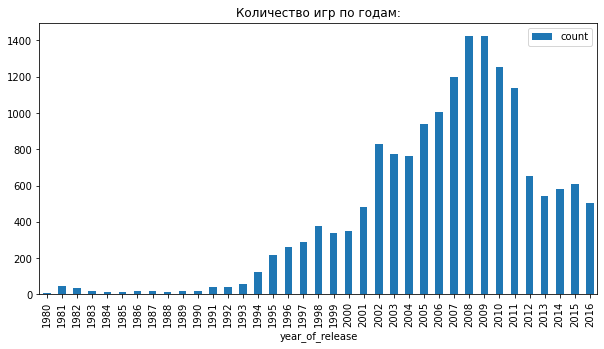

In [23]:
game = df[df['year_of_release']>0].groupby('year_of_release')['name'].agg(['count'])
game.plot( kind='bar', title = 'Количество игр по годам:', figsize = (10,5));

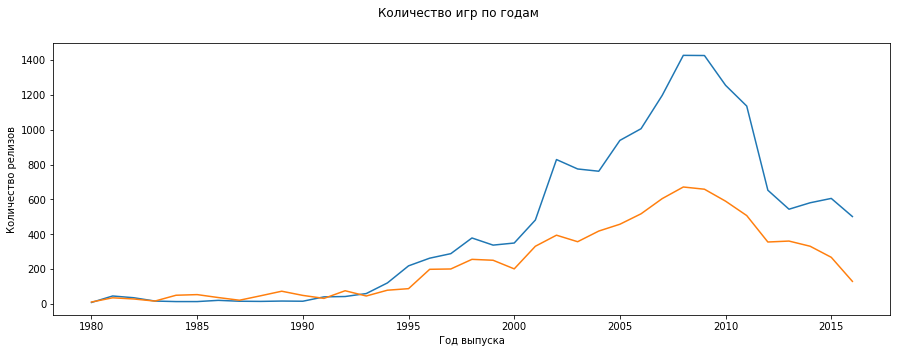

In [24]:
plt.figure(figsize=(15,5))
plt.plot(df.groupby('year_of_release')['name'].count(), label='Релизы')
plt.plot(df.groupby('year_of_release')['sales_amount'].sum(), label='Продажи')
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.suptitle('Количество игр по годам')
plt.show()

На фоне кризиса 2008 года, была перекупка платформ более крупными игроками.

Инвесторы нацелились на вложения в мобильные, казуальные и онлайн игры. Сегодня крупные проекты можно пересчитать по пальцам и все они сетевые и free-to-play. «World of Tanks», «War Thunder», «Warface» и т.д.

В 2000-х гг. становятся популярными видео игры. Пик приходится на 2008 и 2009гг.

#### Выберем платформы с наибольшими суммарными продажами и построим график распределения по годам

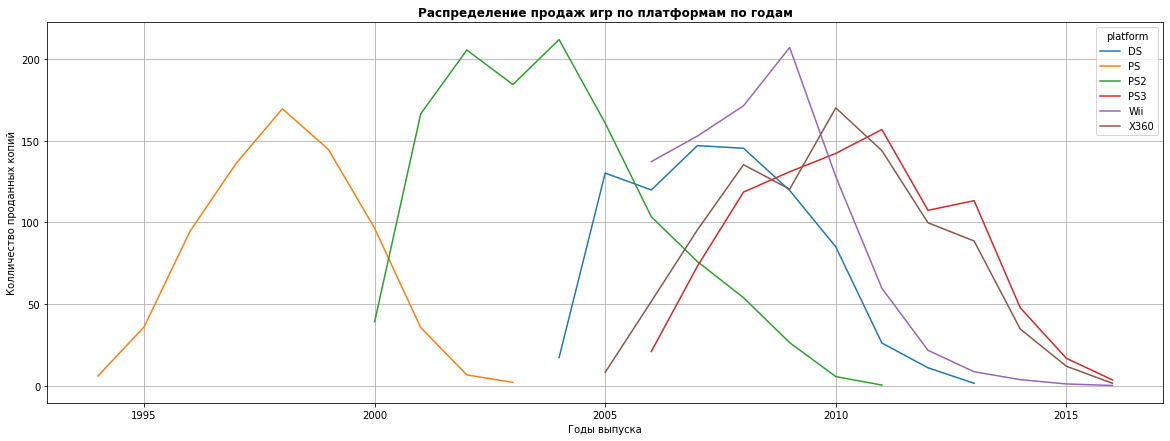

In [25]:
test_top = (df.pivot_table(index = 'platform', values = 'sales_amount', aggfunc = 'sum').reset_index()
                .sort_values(by = 'sales_amount', ascending = False).head(6))['platform']

(df
    .query('platform in @test_top and year_of_release > 1990')
    .pivot_table(index=['year_of_release'], columns='platform', values=['sales_amount'], aggfunc='sum')
    . reset_index()
    .plot(x='year_of_release', y='sales_amount', kind='line', grid=True, figsize=(20,7))
)

plt.title('Распределение продаж игр по платформам по годам', fontweight="bold")
plt.xlabel('Годы выпуска')
plt.ylabel('Колличество проданных копий')
plt.show()

До 1994 года количество игр составляет менее 100, данные для дальнейшего исследования будут не актуальны.

##### Топ-10 платформ

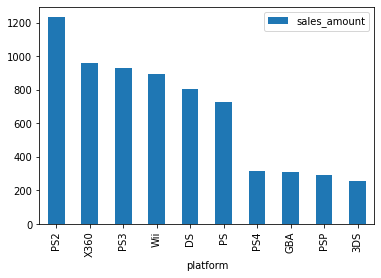

In [26]:
(
    df.pivot_table(index = 'platform', values = 'sales_amount', aggfunc = 'sum')
   .sort_values(by = ('sales_amount'), ascending = False).round(1).head(10)
   .plot(kind='bar')
);

##### За какой характерный срок появляются новые и исчезают старые платформы?

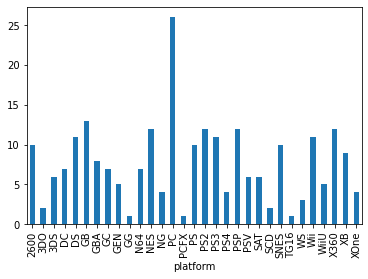

In [27]:
df.groupby('platform')['year_of_release'].agg("nunique").plot(kind = 'bar');

Здесь мы видим за сколько лет компании прекращают работу на игровом рынке

Каждые 6 лет появляется новая платформа. В итоге для множества платформ получается диапазон 4-10 лет.

PC имеет самый большой срок жизни - 32 года. Персональные компьютеры актуальны и по сей день.

##### Какие платформы лидируют по продажам, растут или падают?

In [28]:
current_platform = df.query('2013<=year_of_release<=2016').pivot_table(index=['year_of_release', 'platform']).reset_index()
current_platform

,year_of_release,platform,critic_score,eu_sales,jp_sales,na_sales,other_sales,sales_amount,user_score
0,2013,3DS,66.700000,0.163077,0.259011,0.170989,0.028571,0.621648,6.620000
1,2013,DS,NaN,0.106250,0.000000,0.071250,0.015000,0.192500,4.800000
2,2013,PC,73.212121,0.194474,0.000000,0.102105,0.029211,0.325789,6.163636
3,2013,PS3,71.741176,0.335476,0.096270,0.328968,0.138095,0.898810,6.720455
4,2013,PS4,70.933333,0.690625,0.058750,0.633125,0.241875,1.624375,5.460000
5,2013,PSP,74.000000,0.003148,0.054259,0.000000,0.000741,0.058148,5.850000
6,2013,PSV,70.173913,0.040794,0.064286,0.040000,0.023016,0.168095,7.165385
7,2013,Wii,NaN,0.278333,0.004167,0.373333,0.060000,0.715833,4.820000
8,2013,WiiU,72.370370,0.159524,0.085000,0.234524,0.036429,0.515476,6.912500
9,2013,X360,71.836364,0.360400,0.005733,0.711467,0.103467,1.181067,6.300000


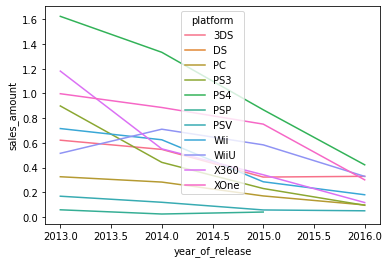

In [29]:
sns.lineplot(data =current_platform, x ="year_of_release", y ="sales_amount", hue="platform", ci=None);

За 2016 год данные не полные.

PlayStation 4, WiiU, XBox One - являются лидерами продаж. Сделаем ставку на эти платформы

PC также имеет стабильный график. 

Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita более не популярны

##### Несколько потенциально прибыльных платформ.

In [30]:
#рассмотрим период от 2000г.
df_year = df[df['year_of_release'] > 2000]

In [31]:
platform_actual = df_year.pivot_table(index='platform', 
                                      values='sales_amount', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'count', 
                                      fill_value=0, 
                                      margins=True).reset_index()
platform_actual = platform_actual[:-1]
platform_actual = platform_actual.rename_axis('index',  axis="columns")

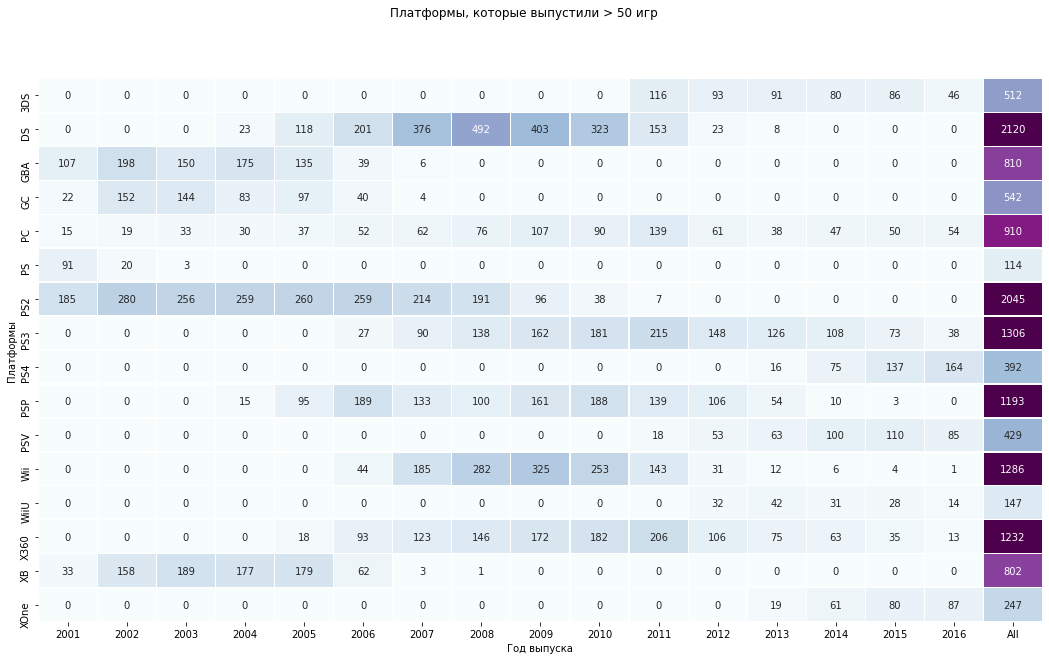

In [32]:
heatmap_platform_actual = platform_actual.query('All > 50').set_index('platform')
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_platform_actual, annot=True, fmt="d", cmap='BuPu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Год выпуска')
plt.ylabel('Платформы')
plt.suptitle('Платформы, которые выпустили > 50 игр')
plt.show()

In [33]:
platforms_top = list(platform_actual.sort_values(by='All', ascending=False)['platform'].head(10))
platform_actual.sort_values(by='All', ascending=False)[['platform', 'All']].head(10)

index,platform,All
2,DS,2120
9,PS2,2045
10,PS3,1306
15,Wii,1286
17,X360,1232
12,PSP,1193
7,PC,910
4,GBA,810
18,XB,802
5,GC,542


Как видим, с 2000 года, больше всего игр выпустили  DS, PS2, PS3

Посмотрим их продажи

In [34]:
sales_platform = df_year.pivot_table(index='platform', 
                                      values='sales_amount', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'sum', 
                                      fill_value=0, 
                                      margins=True).reset_index()
sales_platform = sales_platform[:-1]
sales_platformsales_platform = sales_platform.rename_axis('index',  axis="columns")

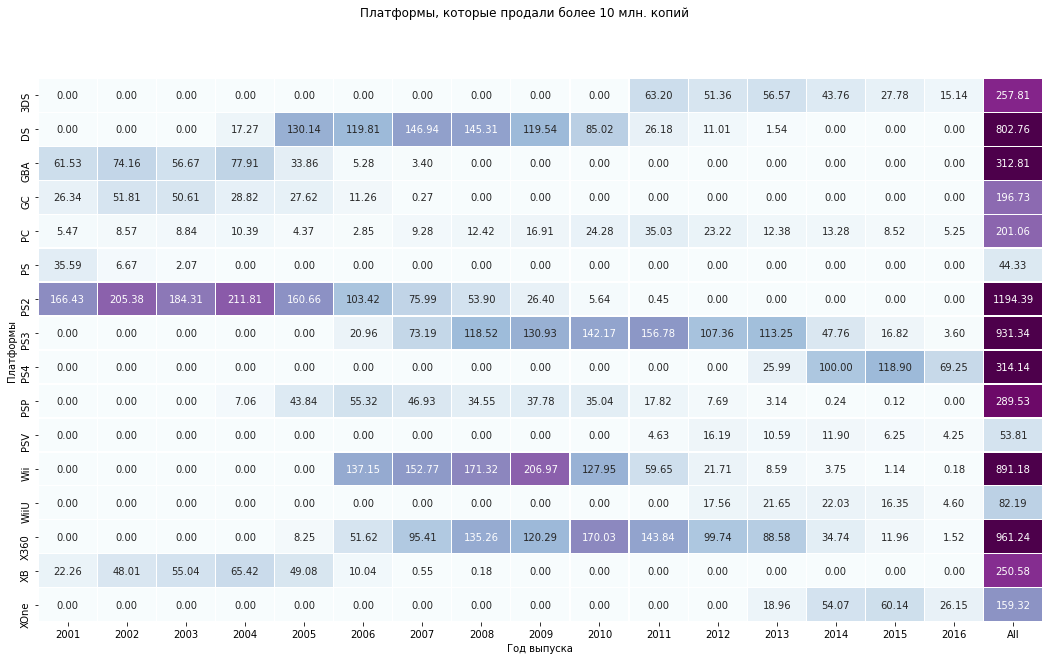

In [35]:
heatmap_platform_sales = sales_platform.query('All > 10').set_index('platform')
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_platform_sales, annot=True, fmt=".2f", cmap='BuPu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Год выпуска')
plt.ylabel('Платформы')
plt.suptitle('Платформы, которые продали более 10 млн. копий')
plt.show()

In [36]:
platforms_top_s = list(sales_platform.sort_values(by='All', ascending=False)['platform'].head(10))
sales_platform.sort_values(by='All', ascending=False)[['platform', 'All']].head(10)

year_of_release,platform,All
9,PS2,1194.39
17,X360,961.24
10,PS3,931.34
15,Wii,891.18
2,DS,802.76
11,PS4,314.14
4,GBA,312.81
12,PSP,289.53
0,3DS,257.81
18,XB,250.58


In [37]:
#актуальный период оставляем 2013-2016гг.
df_actual = df.query('platform in ["PS4", "WiiU", "XOne", "PC", "3DS"] and year_of_release > 2012')

In [38]:
actual_platforms = ["PS4", "WiiU", "XOne", "PC", "3DS"]
df_actual = df.query('year_of_release > 2012')  

обрезала не актуальные периоды и выделила несколько платформ в отдельную переменную для дальнейшего анализа

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [39]:
#sns.boxplot(data =current_platform, x ="platform", y ="sales_amount");

In [40]:
display(df_actual.query('platform in @actual_platforms')
        .pivot_table(index='platform', values='sales_amount', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .sort_values(('median', 'sales_amount'), ascending=False))

,sum,mean,median,std,count
,sales_amount,sales_amount,sales_amount,sales_amount,sales_amount
platform,,,,,
XOne,159.32,0.645020,0.22,1.036139,247
PS4,314.14,0.801378,0.20,1.609456,392
WiiU,64.63,0.562000,0.20,1.038778,115
3DS,143.25,0.472772,0.09,1.381347,303
PC,39.43,0.208624,0.08,0.352304,189


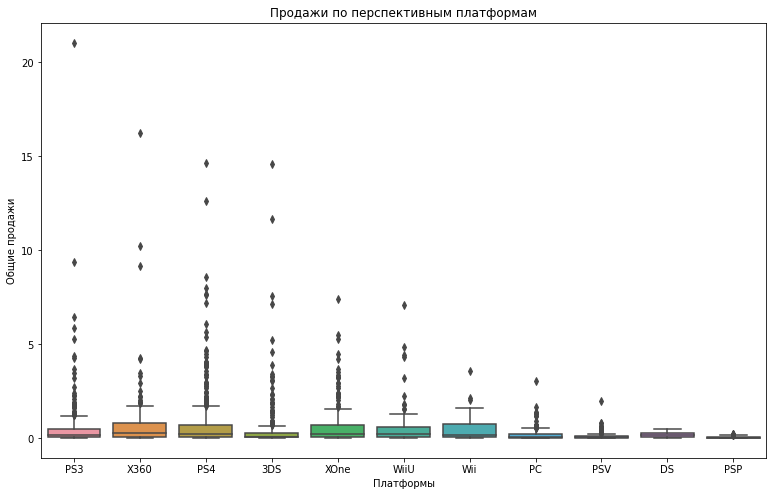

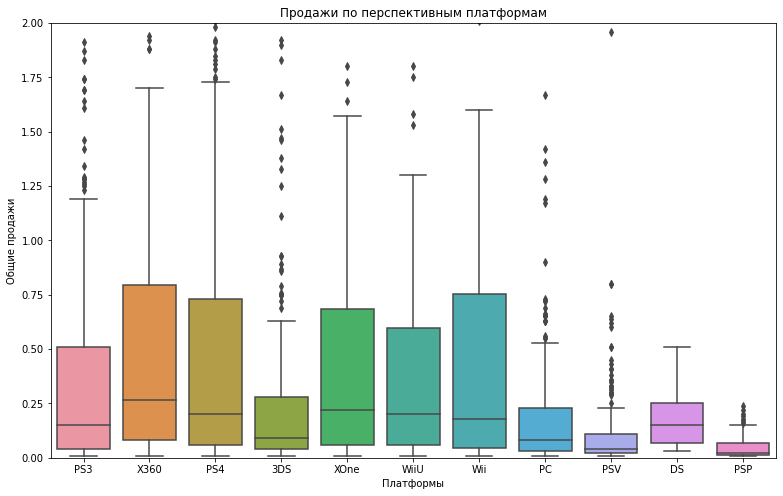

In [82]:
import seaborn as sns
data_temp, y = df_actual, 'sales_amount'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

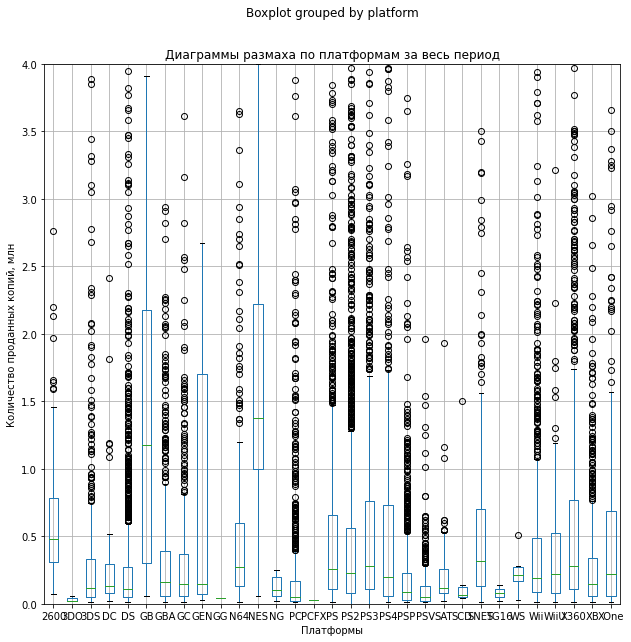

In [41]:
(df.boxplot(column='sales_amount', by='platform', figsize=(10,10))
)
plt.xlabel('Платформы')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по платформам за весь период')
plt.ylim(0, 4)
plt.show()

Диаграмма размаха за весь период выборки с 1980 по 2016гг не отражает актуальную картину. Выберем актуальный период с 2013 по 2016гг

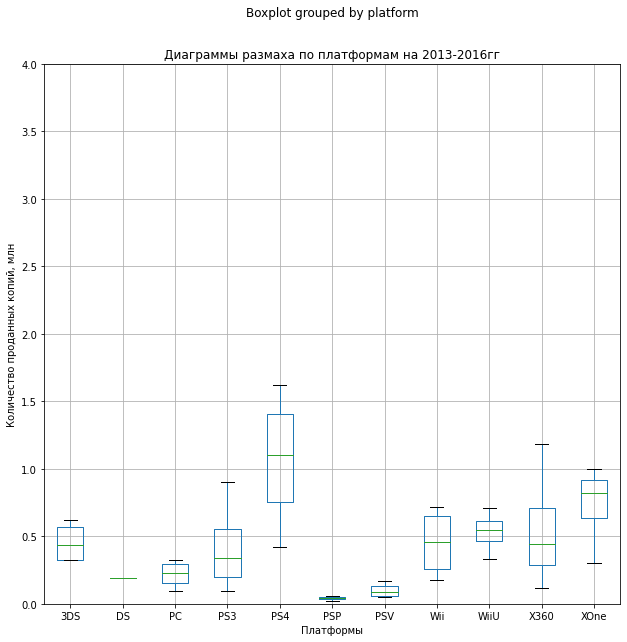

In [42]:
(current_platform.boxplot(column='sales_amount', by='platform', figsize=(10,10))
)
plt.xlabel('Платформы')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по платформам на 2013-2016гг')
plt.ylim(0, 4)
plt.show()

В актуальном периоде для нас будут релевантными 5 плафторм 3DS, PC, PS4, WiiU, XOne

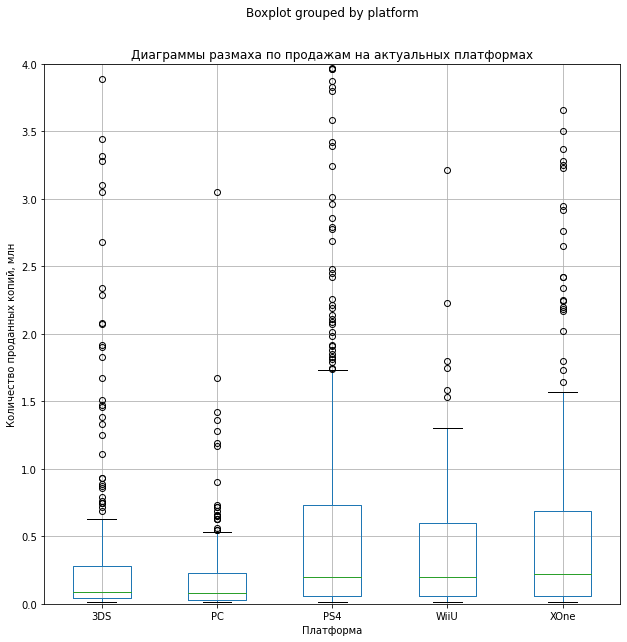

In [43]:
(df_actual.query('platform in @actual_platforms')[['platform', 'name', 'sales_amount']]
 .boxplot(column='sales_amount', by='platform', figsize=(10,10))
)
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 4)
plt.show()

Проверяем 5 популярных платформ 3DS, PC, PS4, WiiU, XOne

Лидер продаж - PS4, учитываем, что платформа 32 года на рынке, при этом на второй год популрность выше в 2 раза.

PC - наименее популярна в выборке, при этом размах узкий, это говорит нам о стабильности платформы.


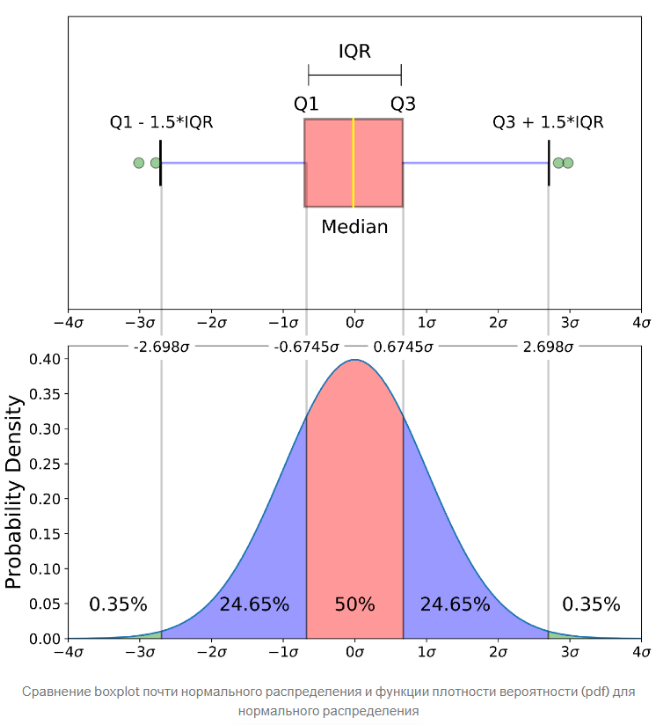

#### Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [44]:
for p in actual_platforms:
    с = df_actual[(df_actual['platform'] == p) & (df_actual['sales_amount'] > 2)]['sales_amount'].count()
    print(f'Платформа {p}, количество бестселлеров  - {с}, доля хитов от общего числа релизов {(с/df_actual[df_actual["platform"] == p]["sales_amount"].count()):.2}')

Платформа PS4, количество бестселлеров  - 44, доля хитов от общего числа релизов 0.11
Платформа WiiU, количество бестселлеров  - 6, доля хитов от общего числа релизов 0.052
Платформа XOne, количество бестселлеров  - 24, доля хитов от общего числа релизов 0.097
Платформа PC, количество бестселлеров  - 1, доля хитов от общего числа релизов 0.0053
Платформа 3DS, количество бестселлеров  - 17, доля хитов от общего числа релизов 0.056


##### Платформа PS4

Рассмотрим платфорум PS4 как самую объемную по продажам и периоду

In [45]:
df_select = df_actual.query('platform == "PS4"') # отберем данные

print(f'Корреляция между оценкой критиков и продажами: {df_select.critic_score.corr(df_select.sales_amount):.2}')
print(f'Корреляция между оценкой пользователей и продажами: {df_select.user_score.corr(df_select.sales_amount):.2}')
print(f'Корреляция между оценками критиков и пользователей: {df_select.critic_score.corr(df_select.user_score):.2}')

Корреляция между оценкой критиков и продажами: 0.41
Корреляция между оценкой пользователей и продажами: -0.032
Корреляция между оценками критиков и пользователей: 0.56


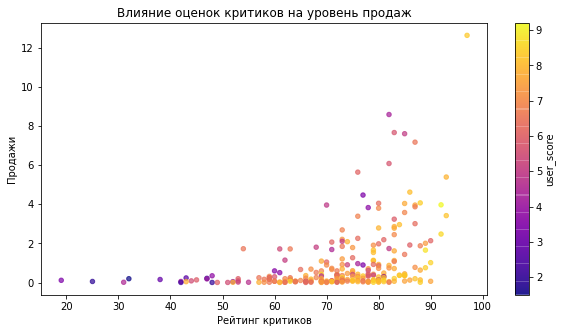

In [46]:
# построим график рассеяния 
df_select = df_select.query('critic_score>0')
df_select.plot.scatter('critic_score',  'sales_amount', figsize=(10, 5), alpha=0.7, c='user_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()


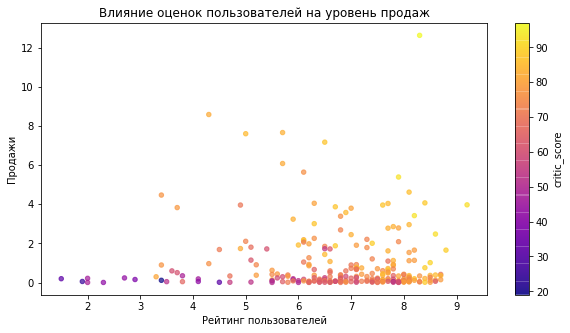

In [47]:
# построим график рассеяния 
df_select.plot.scatter('user_score', 'sales_amount', figsize=(10, 5), alpha=0.7, c='critic_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()

##### Платформа WiiU

In [48]:
 for p in ["Wii", "XOne", "3DS", "PC"]:
    print(p)
    df_select = df.query('platform == @p')
    print(f'Корреляция между оценкой критиков и продажами: {df_select.critic_score.corr(df_select.sales_amount):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {df_select.user_score.corr(df_select.sales_amount):.2}')
    print(f'Корреляция между оценками критиков и пользователей: {df_select.critic_score.corr(df_select.user_score):.2}')
    print('--' * 30)

Wii
Корреляция между оценкой критиков и продажами: 0.18
Корреляция между оценкой пользователей и продажами: 0.11
Корреляция между оценками критиков и пользователей: 0.69
------------------------------------------------------------
XOne
Корреляция между оценкой критиков и продажами: 0.42
Корреляция между оценкой пользователей и продажами: -0.069
Корреляция между оценками критиков и пользователей: 0.47
------------------------------------------------------------
3DS
Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: 0.22
Корреляция между оценками критиков и пользователей: 0.75
------------------------------------------------------------
PC
Корреляция между оценкой критиков и продажами: 0.26
Корреляция между оценкой пользователей и продажами: 0.013
Корреляция между оценками критиков и пользователей: 0.56
------------------------------------------------------------


In [49]:
df_select1 = df_actual.query('platform == "WiiU"') # отберем данные

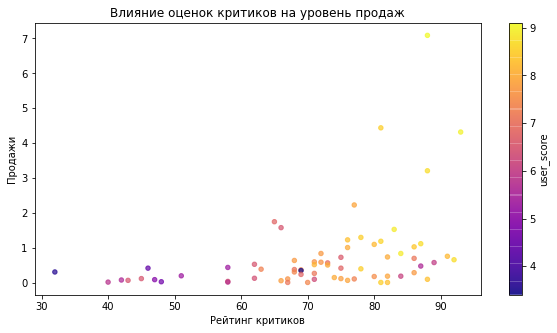

In [50]:
# построим график рассеяния 
df_select1 = df_select1.query('critic_score>0')
df_select1.plot.scatter('critic_score',  'sales_amount', figsize=(10, 5), alpha=0.7, c='user_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()


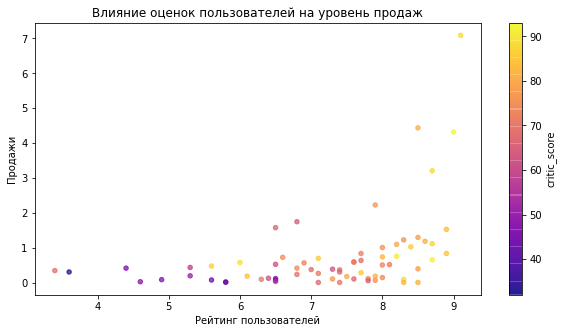

In [51]:
# построим график рассеяния 
df_select1.plot.scatter('user_score', 'sales_amount', figsize=(10, 5), alpha=0.7, c='critic_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()

##### Платформа XOne

In [52]:
df_select2 = df_actual.query('platform == "XOne"') # отберем данные

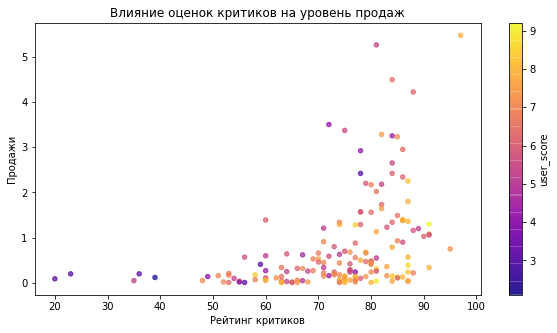

In [53]:
# построим график рассеяния 
df_select2 = df_select2.query('critic_score>0')
df_select2.plot.scatter('critic_score',  'sales_amount', figsize=(10, 5), alpha=0.7, c='user_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()


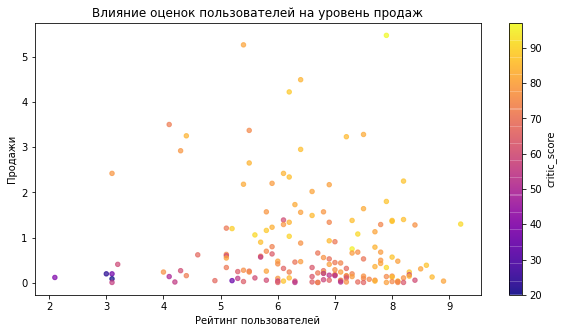

In [54]:
# построим график рассеяния 
df_select2.plot.scatter('user_score', 'sales_amount', figsize=(10, 5), alpha=0.7, c='critic_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()

Посмотрим выбросы больше 5 млн

In [55]:
 df_select2.query('sales_amount > 5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_amount,platform_type,company
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47,stationary,Microsoft
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26,stationary,Microsoft


 GTA V - это несоменно хит, продажи и рейтинги на высоте много лет.

##### Платформа 3DS

In [56]:
df_select3 = df_actual.query('platform == "3DS"') # отберем данные

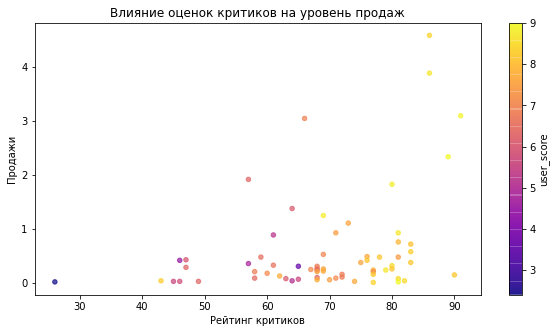

In [57]:
# построим график рассеяния 
df_select3 = df_select3.query('critic_score>0')
df_select3.plot.scatter('critic_score',  'sales_amount', figsize=(10, 5), alpha=0.7, c='user_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()


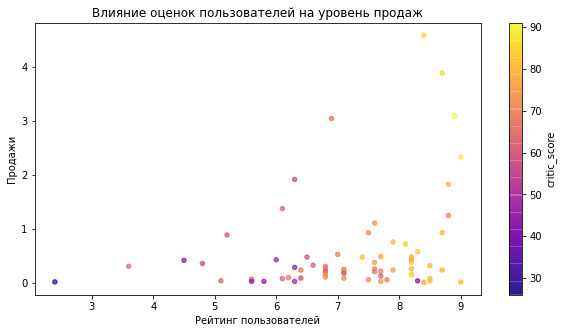

In [58]:
# построим график рассеяния 
df_select3.plot.scatter('user_score', 'sales_amount', figsize=(10, 5), alpha=0.7, c='critic_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()

##### Платформа PC

In [59]:
df_select4 = df_actual.query('platform == "PC"') # отберем данные

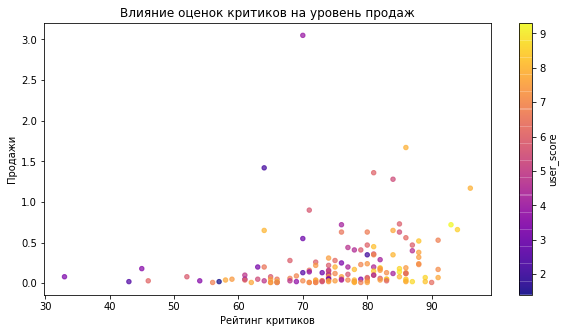

In [60]:
# построим график рассеяния 
df_select4 = df_select4.query('critic_score>0')
df_select4.plot.scatter('critic_score',  'sales_amount', figsize=(10, 5), alpha=0.7, c='user_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()


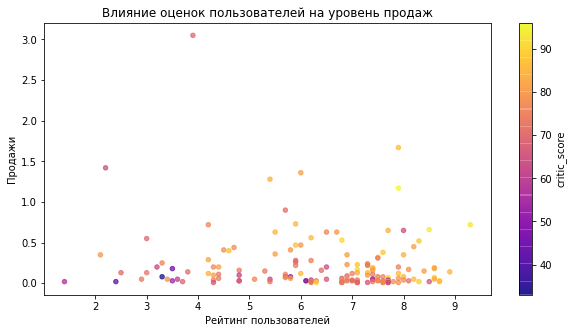

In [61]:
# построим график рассеяния 
df_select4.plot.scatter('user_score', 'sales_amount', figsize=(10, 5), alpha=0.7, c='critic_score', colormap='plasma', sharex=False)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()

**Вывод:**

Оценка критиков имееют большую корреляцию с продажами, чем оценка пользователей. Возможной причиной может быть, что не все пользователи оставляют отзывы. 

* Некоторые игры выпускаются только на одной платформе, к примеру, Killzone. 

* Есть игры, которые покупают из-за многолетней репутации, пример этому GTA V и Call od Duty. 

* Есть игры, которые поставляются с консолью или контролером, за счет этого хорошо идут продажи.


<font color='DarkGreen'> Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
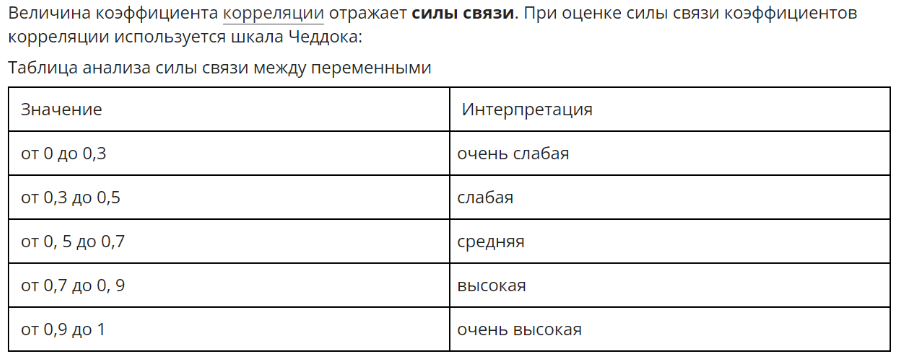

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [62]:
sales_genre = df_actual.pivot_table(index='genre', values='sales_amount', aggfunc = 'sum', fill_value=0, margins=True).reset_index()
sales_genre = sales_genre[:-1]
sales_genre = sales_genre.rename_axis('index',  axis="columns").set_index('genre').sort_values('genre', ascending=True)

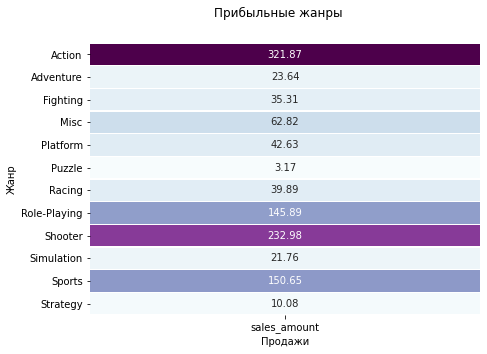

In [63]:
plt.figure(figsize=(7, 5))
sns.heatmap(sales_genre, annot=True, fmt=".2f", cmap='BuPu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Продажи')
plt.ylabel('Жанр')
plt.suptitle('Прибыльные жанры')
plt.show()

Самые популярные жанры:
* Экшн
* Спорт
* Стрелялки
* Ролевые игры

In [64]:
display(df_actual
        .pivot_table(index='genre', values='sales_amount', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .reset_index().sort_values(('median', 'sales_amount'), ascending=False))

,genre,sum,mean,median,std,count
,,sales_amount,sales_amount,sales_amount,sales_amount,sales_amount
8,Shooter,232.98,1.245882,0.450,2.014107,187
10,Sports,150.65,0.703972,0.240,1.219237,214
4,Platform,42.63,0.576081,0.225,0.806808,74
7,Role-Playing,145.89,0.499623,0.125,1.353164,292
2,Fighting,35.31,0.441375,0.125,1.048883,80
6,Racing,39.89,0.469294,0.120,0.964101,85
0,Action,321.87,0.420196,0.110,1.253909,766
9,Simulation,21.76,0.350968,0.100,0.849163,62
3,Misc,62.82,0.405290,0.100,1.007985,155


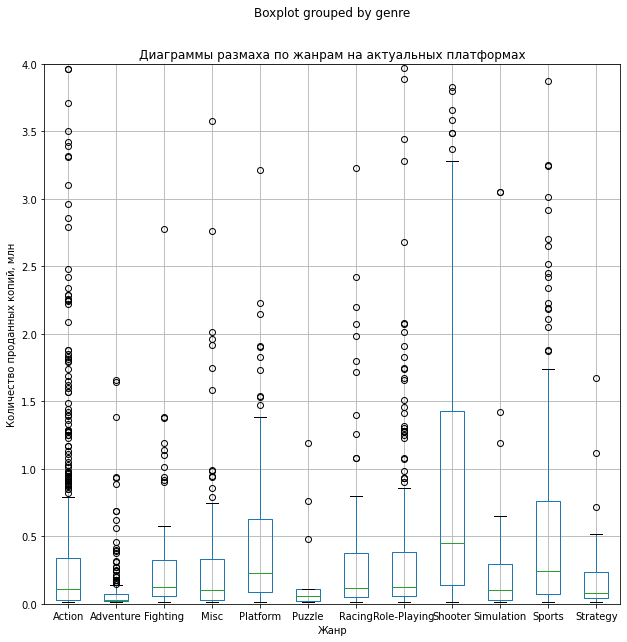

In [65]:
(df_actual.boxplot(column='sales_amount', by='genre', figsize=(10,10))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по жанрам на актуальных платформах')
plt.ylim(0, 4)
plt.show()

In [66]:
for g in ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']:
    с = df_actual[(df_actual['genre'] == g) & (df_actual['sales_amount'] > 2)]['sales_amount'].count()
    print(f'Жанр {g}, количество бестселлеров - {с}, доля хитов от общего числа релизов {(с/df_actual[df_actual["genre"] == g]["sales_amount"].count()):.2}')

Жанр Action, количество бестселлеров - 31, доля хитов от общего числа релизов 0.04
Жанр Sports, количество бестселлеров - 22, доля хитов от общего числа релизов 0.1
Жанр Shooter, количество бестселлеров - 35, доля хитов от общего числа релизов 0.19
Жанр Role-Playing, количество бестселлеров - 13, доля хитов от общего числа релизов 0.045
Жанр Platform, количество бестселлеров - 4, доля хитов от общего числа релизов 0.054


После проверки повторной проверки жанров, можно сделать следующие выводы: <a id='genre'></a>
    
1. **Шутеры - самый популярный жанр**

Шутеры от первого лица очаровывают большинство игроков простыми принципами игры и встроенным управлением с помощью мыши, клавиатуры или контроллера. 

2. **На втором месте по по популярности**

Платформер  — жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня.

3. **На третьем месте жанр Спорт**

Этот жанр был популярен на протяжении всей истории видеоигр и является соревновательным, как и в реальном спорте. Ряд игровых серий содержат имена с характеристиками реальных команд и игроков, а также ежегодно обновляются, чтобы отразить изменения в реальном мире.

Также, на основании ошибок прошлого анализа, можно сказать, что экшн имеет больше всего релизов и продаж, но по медианным и средним продажам не входит даже в 5 лучших жанров

### Составьте портрет пользователя каждого региона

#### Определим портрет для пользователей регионов 

In [67]:
html_str = ''
s1 = (
    df_actual.pivot_table(index='company', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s1}</td>'
s2 = (
    df_actual.pivot_table(index='company', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s2}</td>'
s3 = (
    df_actual.pivot_table(index='company', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s3}</td>'
display_html(html_str, raw = True)

,na_sales
company,
Sony,177.280000
Microsoft,174.780000
Nintendo,74.540000
PC,11.110000
,eu_sales
company,
Sony,215.170000
Microsoft,94.110000
Nintendo,57.590000


In [68]:
 html_str = ''
s1 = (
    df_actual.pivot_table(index='platform_type', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s1}</td>'
s2 = (
    df_actual.pivot_table(index='platform_type', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s2}</td>'
s3 = (
    df_actual.pivot_table(index='platform_type', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s3}</td>'
display_html(html_str, raw = True)

,na_sales
platform_type,
stationary,382.790000
mobile,43.810000
PC,11.110000
,eu_sales
platform_type,
stationary,328.790000
mobile,38.080000
PC,25.360000
,jp_sales


In [69]:
# объединим данные по продажам по фирмам-производителям и типам платформ
df_actual.groupby(['company', 'platform_type', 'platform'])[['na_sales', 'eu_sales','jp_sales']].sum().style.background_gradient(cmap='YlOrRd')

В Северной Америке и Европе лидируют стационарные консоли.
PS 4 в топе популярности. А в Японии Nintendo продается лучше всего. 
XBox 360, XOne, 3DS, PlayStation 3, также отлично продаются, но имеют разные позиции на рынках стран.

#### Топ-5 платформ и жанров

In [70]:
html_str = ''
s1 = (
    df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s1}</td>'
s2 = (
    df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s2}</td>'
s3 = (
    df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s3}</td>'
display_html(html_str, raw = True)

,na_sales
genre,
Action,126.050000
Shooter,109.740000
Sports,65.270000
Role-Playing,46.400000
Misc,27.490000
,eu_sales
genre,
Action,118.130000
Shooter,87.860000


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Любой анализ данных требует визуализации его результатов. Табличные данные не всегда информативны. У нас этого не сделано. Лучше сделать круговые диаграммы, а данные не вошедшие в ТОП просуммировать и вывести отдельной группой "Другие", и по платформам, и по жанрам. Тогда на такой диаграмме хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
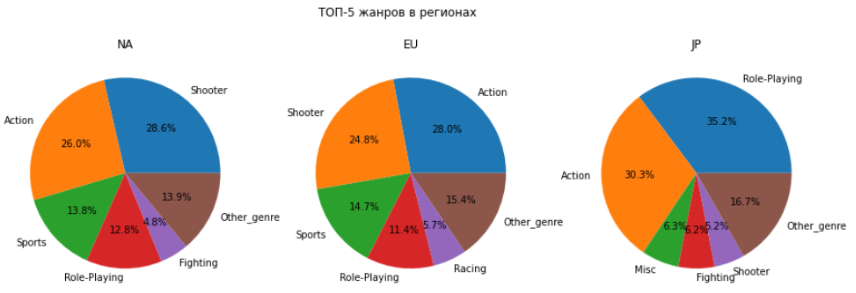

##### Топ 5 платформ

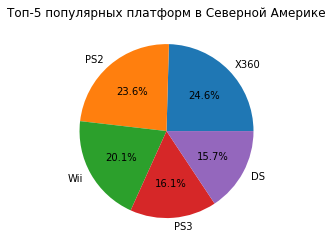

In [71]:
na_sales_platform = df.pivot_table (index ='platform', values = 'na_sales', aggfunc = ['sum'])
na_sales_platform.columns = ['na_sum_sales']
na_sales_platform = na_sales_platform.sort_values (by='na_sum_sales', ascending = False).head ()
na_sales_platform.plot (kind='pie', subplots=True, autopct = '%1.1f%%', legend=False);
labels = na_sales_platform.index.unique()
plt.axis ('off')

plt.title ('Топ-5 популярных платформ в Северной Америке');

X360 самая популярная платформа в Северной Америке, почти не отстает и PS2

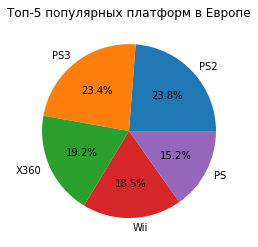

In [72]:
eu_sales_platform = df.pivot_table (index ='platform', values = 'eu_sales', aggfunc = ['sum'])
eu_sales_platform.columns = ['eu_sum_sales']
eu_sales_platform = eu_sales_platform.sort_values (by='eu_sum_sales', ascending = False).head ()
eu_sales_platform.plot (kind='pie', subplots=True, autopct = '%1.1f%%', legend=False);
labels = eu_sales_platform.index.unique()
plt.axis ('off')
plt.title ('Топ-5 популярных платформ в Европе');

В Европе в топе PS2, а PS3 на втором месте, разница всего 0,4%

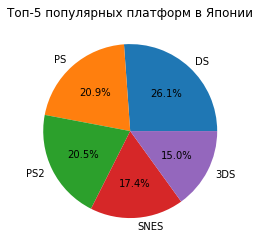

In [73]:
jp_sales_platform = df.pivot_table (index ='platform', values = 'jp_sales', aggfunc = ['sum'])
jp_sales_platform.columns = ['jp_sum_sales']
jp_sales_platform = jp_sales_platform.sort_values (by='jp_sum_sales', ascending = False).head ()
jp_sales_platform.plot (kind='pie', subplots=True, autopct = '%1.1f%%', legend=False);
labels = jp_sales_platform.index.unique()
plt.axis ('off')
plt.title ('Топ-5 популярных платформ в Японии');

А в Японии больше любят DS

##### Топ 5 жанров

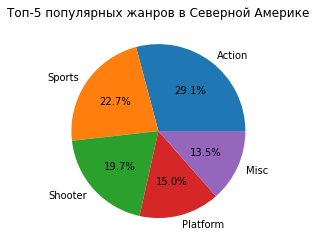

In [74]:
na_sales_genre = df.pivot_table (index ='genre', values = 'na_sales', aggfunc = ['sum'])
na_sales_genre.columns = ['na_sum_sales']
na_sales_genre = na_sales_genre.sort_values (by='na_sum_sales', ascending = False).head ()
na_sales_genre.plot (kind='pie', subplots=True, autopct = '%1.1f%%', legend=False);
labels = na_sales_genre.index.unique()
plt.axis ('off')
plt.title ('Топ-5 популярных жанров в Северной Америке');

В Северной Америке любят экшены

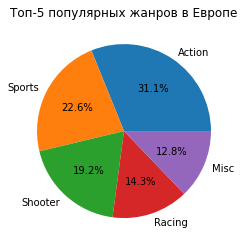

In [75]:
eu_sales_genre = df.pivot_table (index ='genre', values = 'eu_sales', aggfunc = ['sum'])
eu_sales_genre.columns = ['eu_sum_sales']
eu_sales_genre = eu_sales_genre.sort_values (by='eu_sum_sales', ascending = False).head ()
eu_sales_genre.plot (kind='pie', subplots=True, autopct = '%1.1f%%', legend=False);
labels = eu_sales_genre.index.unique()
plt.axis ('off')
plt.title ('Топ-5 популярных жанров в Европе');

В Европе, также преобладают экшены

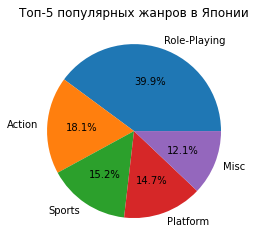

In [76]:
jp_sales_genre = df.pivot_table (index ='genre', values = 'jp_sales', aggfunc = ['sum'])
jp_sales_genre.columns = ['jp_sum_sales']
jp_sales_genre = jp_sales_genre.sort_values (by='jp_sum_sales', ascending = False).head ()
jp_sales_genre.plot (kind='pie', subplots=True, autopct = '%1.1f%%', legend=False);
labels = jp_sales_genre.index.unique()
plt.axis ('off')
plt.title ('Топ-5 популярных жанров в Японии');

Японцам нравятся ролевые игры. Разница с экшеном почти в 22%

#### Влияние рейтинга ESRB

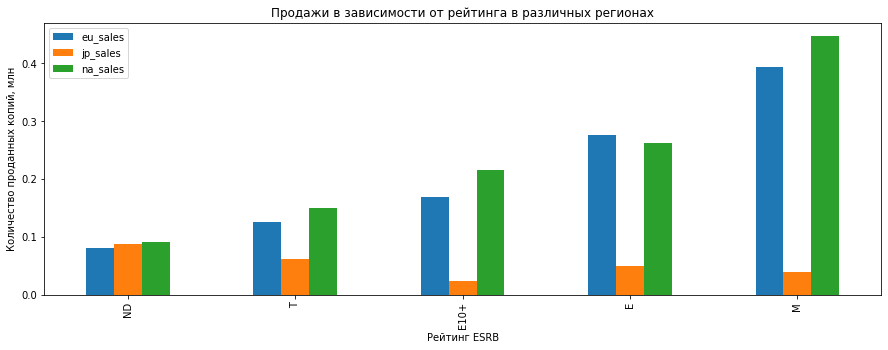

In [77]:
 (
    df_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')
    .sort_values(by='na_sales')
    .plot(kind='bar', figsize=(15, 5))
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

В Северной Америке и Европе больше всего продаются игры с рейтингом 16+.
Следующая категория доступна взрослым и детям, поэтому тоже имеет хорошую популярность

### Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Гипотеза - сравниваем оценки пользователей платформ XOne и PC. Платформы могут быть похожи, либо иметь разную динамику

Н0 - "средние рейтинги не отличаются".

Н1 - "отличаются"

Значение критического уровня вероятности (альфа) примем равным 5%.


In [78]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df_actual[(df_actual.platform == "XOne") & (df_actual.user_score.notna())]['user_score'], 
    df_actual[(df_actual.platform == "PC") & (df_actual.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
 
display(df_actual.query('platform in ["XOne", "PC"]')
        .pivot_table(index='platform', values='user_score', aggfunc=['count', 'mean', 'median', 'var']))

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


,count,mean,median,var
,user_score,user_score,user_score,user_score
platform,,,,
PC,155,6.269677,6.8,3.035893
XOne,182,6.521429,6.8,1.906997


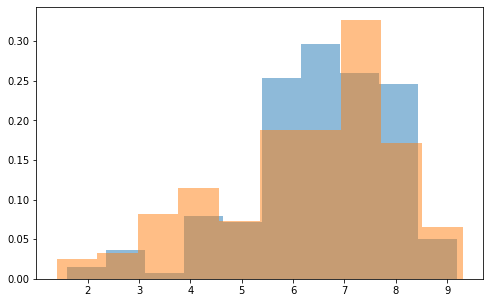

In [79]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_actual[(df_actual.platform == "XOne") & (df_actual.user_score.notna())]['user_score'], bins=10, density=True, alpha=0.5)
ax.hist(df_actual[(df_actual.platform == "PC") & (df_actual.user_score.notna())]['user_score'], bins=10, density=True, alpha=0.5)
plt.show()

Оценки пользователей на платформах XOne и PC почти равны. Гипотеза верна

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Гипотеза - средние рейтинги пользователей экшн и спорт равны.
Будем использовать двустороннюю гипотезу

Н0 - "средние рейтинги по платформам равны".

Н1 - "средние рейтинги по платформам отличаются"

Значение критического уровня вероятности (альфа) примем равным 5%. Если показатель будет низкий, мы отвергнем нулевую гипотезу и примем альтернативную

In [80]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df_actual[(df_actual.genre == "Action") & (df_actual.user_score.notna())]['user_score'], 
    df_actual[(df_actual.genre == "Sports") & (df_actual.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
display(df_actual.query('genre in ["Action", "Sports"]')
        .pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'median', 'var']))

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


,count,mean,median,var
,user_score,user_score,user_score,user_score
genre,,,,
Action,389,6.837532,7.1,1.769361
Sports,160,5.238125,5.5,3.180613


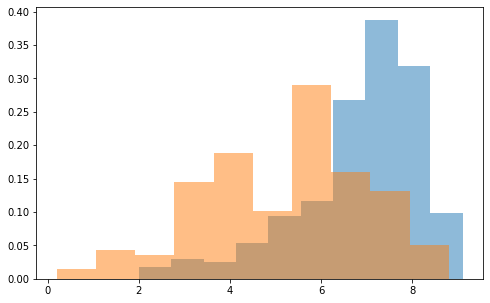

In [81]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_actual[(df_actual.genre == "Action") & (df_actual.user_score.notna())]['user_score'], bins=10, density=True, alpha=0.5)
ax.hist(df_actual[(df_actual.genre == "Sports") & (df_actual.user_score.notna())]['user_score'], bins=10, density=True, alpha = 0.5)
plt.show()

Гипотеза маловероятна, оценки пользователей отличаются

**Вывод:**

Оценки пользователей зависят от жанра, но не зависят от платформ. При значении критечского уровня статистической значимости 0.05 мы выяснили, что первая гипотеза верна, вторая нет.

### Общий вывод

---

**Цель исследования** - сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год. 

**Выборка данных** - видеоигры с 1980 по 2016гг.

---

В данном иследовании, мы изучили пропущенные значения, убрали аномальные значения, провели изучение параметров с помощью гистограмм и графиков корреляции, выяснили зависимости различных параметров, провели статистический анализ.


---

<div style="border: solid green 2px; padding: 20px"> 
<b> Какие интересные особенности и зависимости удалось найти:</b>
    

**Популярные жанры**
* Стрелялки
* Платформы
* Спорт
    
[Подробный вывод о жанрах](#genre)
    
**Популярные платформы актуального периода (2013-2016гг)**
* PlayStation 4
* WiiU
* XBox One
    
**Северная Америка и Европа имеют схожие предпочтения в видеоиграх:**
* XBox 360
* XOne
* PlayStation 3
* PlayStation 4

**Япония отличается по топ играм**
    
Любимая игра японцев - Nintendo 3DS
    
    
</div>

<div class="alert alert-success">
<b>Рекомендации для маркетологов</b> 

Важно учитывать предпочтения пользователей в жанрах, ориентируясь на рынок конкретной страны. Для Японии будут более релевантными ролевые игры, а Северной Америке и Европе - экшены.

При этом, исторически самые популярные жанры Шутеры, Спорт и Платформы

Изучать отзывы критиков, т.к. от этого больше зависят продажи платформым.
    
В 2017 году стоит брать ориентир на платформы PS4 и XBox One

</div>